In [11]:
pip install hilbertcurve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
from hilbertcurve.hilbertcurve import HilbertCurve
from numpy import asarray
import numpy as np
import cv2
import matplotlib.pyplot as plt

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

[[0, 0], [1, 0], [1, 1], [0, 1], [0, 2], [0, 3], [1, 3], [1, 2], [2, 2], [2, 3], [3, 3], [3, 2], [3, 1], [2, 1], [2, 0], [3, 0], [4, 0], [4, 1], [5, 1], [5, 0], [6, 0], [7, 0], [7, 1], [6, 1], [6, 2], [7, 2], [7, 3], [6, 3], [5, 3], [5, 2], [4, 2], [4, 3], [4, 4], [4, 5], [5, 5], [5, 4], [6, 4], [7, 4], [7, 5], [6, 5], [6, 6], [7, 6], [7, 7], [6, 7], [5, 7], [5, 6], [4, 6], [4, 7], [3, 7], [2, 7], [2, 6], [3, 6], [3, 5], [3, 4], [2, 4], [2, 5], [1, 5], [1, 4], [0, 4], [0, 5], [0, 6], [1, 6], [1, 7], [0, 7], [0, 8], [0, 9], [1, 9], [1, 8], [2, 8], [3, 8], [3, 9], [2, 9], [2, 10], [3, 10], [3, 11], [2, 11], [1, 11], [1, 10], [0, 10], [0, 11], [0, 12], [1, 12], [1, 13], [0, 13], [0, 14], [0, 15], [1, 15], [1, 14], [2, 14], [2, 15], [3, 15], [3, 14], [3, 13], [2, 13], [2, 12], [3, 12], [4, 12], [5, 12], [5, 13], [4, 13], [4, 14], [4, 15], [5, 15], [5, 14], [6, 14], [6, 15], [7, 15], [7, 14], [7, 13], [6, 13], [6, 12], [7, 12], [7, 11], [7, 10], [6, 10], [6, 11], [5, 11], [4, 11], [4, 10], 

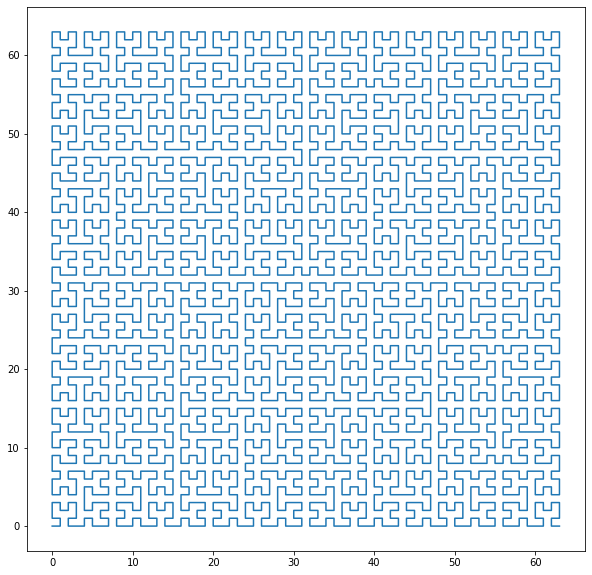

In [127]:
p=6 #Order
n=2 #Dimension (here 2D)
total=(n**p)**2
hilbert_curve = HilbertCurve(p, n)
distances = list(range(total))
points = hilbert_curve.points_from_distances(distances) #array of x,y distances for [i]th element
print(points)
x_coords, y_coords = zip(*points)
plt.figure(figsize=(10,10))
plt.plot(x_coords, y_coords)

In [14]:
coords = hilbert_curve.distances_from_points(points)
print(coords)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [15]:
from google.colab import files
uploaded = files.upload()

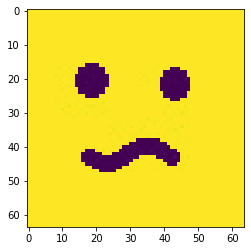

In [129]:
img64 = cv2.imread('test.jpg',0)
plt.imshow(img64)

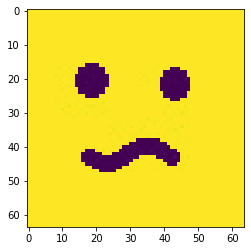

In [130]:
img16 = cv2.resize(img64, dsize=(64, 64))
plt.imshow(img16)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0. 0. 0. ... 0. 0. 0.]
(4096,)


<StemContainer object of 3 artists>

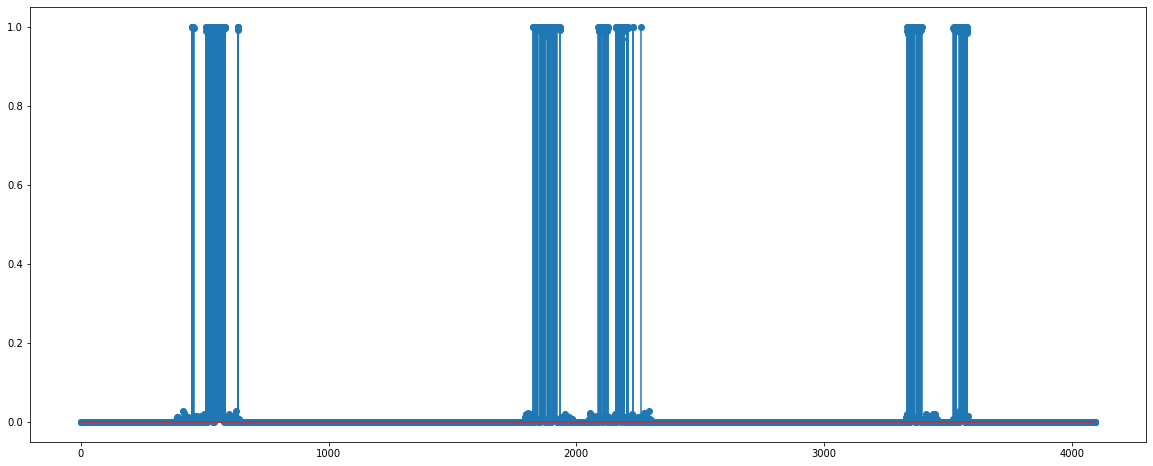

In [132]:
rimg16=cv2.bitwise_not(img16)
print(rimg16)
hilbert_array=np.zeros(4096)
for i in range(4096):
  hilbert_array[i]=rimg16[points[i][0]][points[i][1]]
#print(np.shape(hilbert_array))
#print(hilbert_array)
domain=range(4096)
normalized_hilbert_array = (hilbert_array - np.min(hilbert_array)) / (np.max(hilbert_array) - np.min(hilbert_array))
print(normalized_hilbert_array)
print(np.shape(normalized_hilbert_array))
plt.figure(figsize=(20,8))
plt.stem(domain,normalized_hilbert_array)

In [133]:
frequency=normalize(normalized_hilbert_array,{'actual': {'lower': 0, 'upper': 1}, 'desired': {'lower': 500, 'upper': 15000}})
print(frequency)

[500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0

In [135]:
start=100
stop=2500
num_points=4096
eqpoints = np.linspace(start, stop, num_points)
for i in range(4096):
  eqpoints[i]=round(eqpoints[i],6)
print(eqpoints)

[ 100.        100.586081  101.172161 ... 2498.827839 2499.413919
 2500.      ]


In [136]:
freqs_intensities=dict(zip(eqpoints, normalized_hilbert_array))
print(freqs_intensities)

for key in eqpoints:
  if freqs_intensities[key] != 0:
    print("frequency: ", key,"    intensity",freqs_intensities[key])
    
  else:
    pass

{100.0: 0.0, 100.586081: 0.0, 101.172161: 0.0, 101.758242: 0.0, 102.344322: 0.0, 102.930403: 0.0, 103.516484: 0.0, 104.102564: 0.0, 104.688645: 0.0, 105.274725: 0.0, 105.860806: 0.0, 106.446886: 0.0, 107.032967: 0.0, 107.619048: 0.0, 108.205128: 0.0, 108.791209: 0.0, 109.377289: 0.0, 109.96337: 0.0, 110.549451: 0.0, 111.135531: 0.0, 111.721612: 0.0, 112.307692: 0.0, 112.893773: 0.0, 113.479853: 0.0, 114.065934: 0.0, 114.652015: 0.0, 115.238095: 0.0, 115.824176: 0.0, 116.410256: 0.0, 116.996337: 0.0, 117.582418: 0.0, 118.168498: 0.0, 118.754579: 0.0, 119.340659: 0.0, 119.92674: 0.0, 120.512821: 0.0, 121.098901: 0.0, 121.684982: 0.0, 122.271062: 0.0, 122.857143: 0.0, 123.443223: 0.0, 124.029304: 0.0, 124.615385: 0.0, 125.201465: 0.0, 125.787546: 0.0, 126.373626: 0.0, 126.959707: 0.0, 127.545788: 0.0, 128.131868: 0.0, 128.717949: 0.0, 129.304029: 0.0, 129.89011: 0.0, 130.47619: 0.0, 131.062271: 0.0, 131.648352: 0.0, 132.234432: 0.0, 132.820513: 0.0, 133.406593: 0.0, 133.992674: 0.0, 134.5

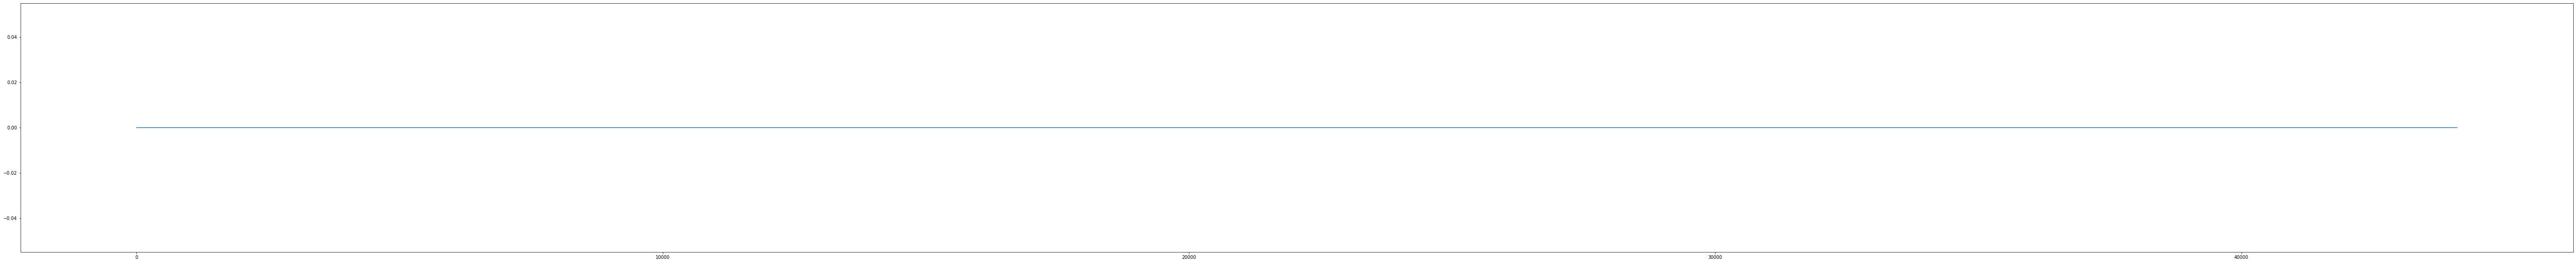

In [137]:
samplerate = 44100
def gen_sinewave(freq,t,scaling=1):
  t = np.linspace(0., 1., samplerate)
  amplitude = np.iinfo(np.int16).max
  data = amplitude * scaling * np.sin(2. * np.pi * freq * t)
  return data

var=gen_sinewave(0,2)
plt.figure(figsize=(100,10))
plt.plot(var)

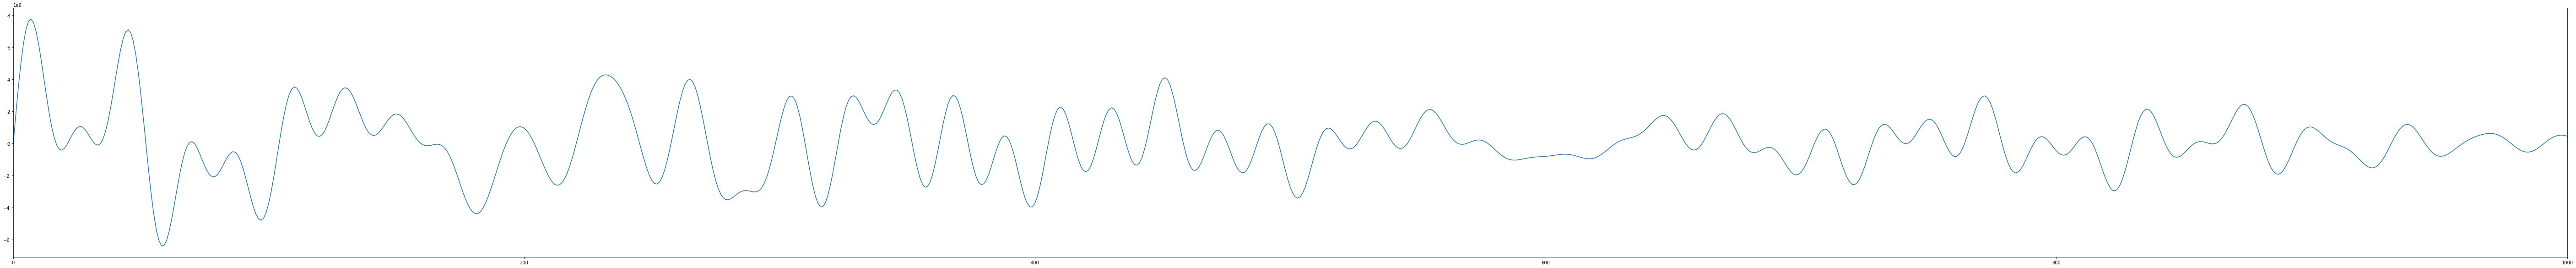

In [138]:
from scipy.io.wavfile import write
t=0.1
bsin=gen_sinewave(0,1,1)
for i in range(4096):
  sin=gen_sinewave(eqpoints[i],1,normalized_hilbert_array[i])
  bsin=np.add(sin,bsin)
plt.figure(figsize=(100,10))
plt.xlim([0,1000])
plt.plot(bsin)
write("example.wav", samplerate, bsin.astype(np.int16))